<a href="https://colab.research.google.com/github/sumanssamui/Old-Car-Prediction_/blob/main/old_car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
path = '/content/drive/MyDrive/car_price.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv(path)
df

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats
...,...,...,...,...,...,...,...,...,...,...
5507,5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000 kms",Diesel,Automatic,1st Owner,2018,2995 cc,7 Seats
5508,5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000 kms",Petrol,Automatic,2nd Owner,2015,1968 cc,5 Seats
5509,5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000 kms",Diesel,Automatic,2nd Owner,2013,2755 cc,5 Seats
5510,5510,BMW 7 Series 730Ld,29.90 Lakh,"79,000 kms",Diesel,Automatic,3rd Owner,2015,2967 cc,6 Seats


In [ ]:
df[df.duplicated()].count()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


In [ ]:
df[df.isna()].count()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [ ]:
df=df.drop(columns='Unnamed: 0',axis=1)

In [ ]:
df.loc[df['car_prices_in_rupee'].str.contains('Lakh'), 'Currency'] = 'Lakh'
df.loc[df['car_prices_in_rupee'].str.contains('Crore'), 'Currency'] = 'Crore'

In [ ]:
df=df.dropna()
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Currency
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,Lakh
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,Lakh
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,Lakh
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,Lakh
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,Lakh


In [ ]:
# Dealing with Currencies and other objects:

In [ ]:
df['kms_driven']=df['kms_driven'].str.replace(' kms','')
df['car_prices_in_rupee']=df['car_prices_in_rupee'].str.replace(' Lakh','')
df['kms_driven']=df['kms_driven'].str.replace(',','')
df['Seats']=df['Seats'].str.replace(' Seats','')
df['engine']=df['engine'].str.replace(' cc','')
df['car_prices_in_rupee']=df['car_prices_in_rupee'].str.replace(' Crore','')

In [ ]:
df['car_prices_in_rupee']=df['car_prices_in_rupee'].astype('float')
df['kms_driven']=df['kms_driven'].astype('int')
df['Seats']=df['Seats'].astype('int')
df['engine']=df['engine'].astype('int')

In [ ]:
#Currency exchange:
df['car_prices_in_rupee']=np.where(df['Currency'] == 'Crore',
                                           df['car_prices_in_rupee'] * 100,
                                           df['car_prices_in_rupee'])

In [ ]:
df['car_prices_in_rupee']=df['car_prices_in_rupee']*100000

In [ ]:
df2=pd.read_csv(path)
df2=df2[df2["car_prices_in_rupee"].str.contains("Lakh")==False]
df2=df2[df2["car_prices_in_rupee"].str.contains("Crore")==False]
df2['kms_driven']=df2['kms_driven'].str.replace(' kms','')
df2['kms_driven']=df2['kms_driven'].str.replace(',','')
df2['Seats']=df2['Seats'].str.replace(' Seats','')
df2['engine']=df2['engine'].str.replace(' cc','')
df2['car_prices_in_rupee']=df2['car_prices_in_rupee'].str.replace(',','')
df2['car_prices_in_rupee']=df2['car_prices_in_rupee'].astype('int')
df2['kms_driven']=df2['kms_driven'].astype('int')
df2['Seats']=df2['Seats'].astype('int')
df2['engine']=df2['engine'].astype('int')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 238 to 5439
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           123 non-null    int64 
 1   car_name             123 non-null    object
 2   car_prices_in_rupee  123 non-null    int64 
 3   kms_driven           123 non-null    int64 
 4   fuel_type            123 non-null    object
 5   transmission         123 non-null    object
 6   ownership            123 non-null    object
 7   manufacture          123 non-null    int64 
 8   engine               123 non-null    int64 
 9   Seats                123 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 10.6+ KB


In [ ]:
df3=[df,df2]
df=pd.concat(df3)

In [ ]:
df=df.drop(columns='Unnamed: 0',axis=1)
df=df.drop(columns='Currency',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 5439
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5512 non-null   object 
 1   car_prices_in_rupee  5512 non-null   float64
 2   kms_driven           5512 non-null   int64  
 3   fuel_type            5512 non-null   object 
 4   transmission         5512 non-null   object 
 5   ownership            5512 non-null   object 
 6   manufacture          5512 non-null   int64  
 7   engine               5512 non-null   int64  
 8   Seats                5512 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 430.6+ KB


**DATA ANALYSIS**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 5439
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5512 non-null   object 
 1   car_prices_in_rupee  5512 non-null   float64
 2   kms_driven           5512 non-null   int64  
 3   fuel_type            5512 non-null   object 
 4   transmission         5512 non-null   object 
 5   ownership            5512 non-null   object 
 6   manufacture          5512 non-null   int64  
 7   engine               5512 non-null   int64  
 8   Seats                5512 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 430.6+ KB


In [ ]:
plt.style.use('Solarize_Light2')

<Axes: title={'center': 'Average car price by Year'}, xlabel='manufacture'>

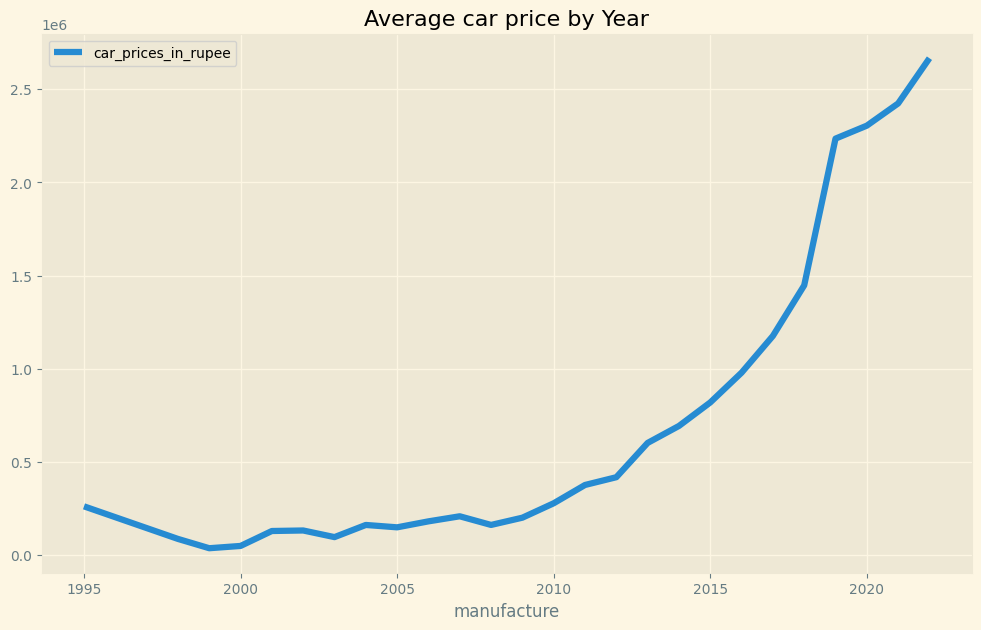

In [ ]:
pv1=pd.pivot_table(df, index=['manufacture'],values = ['car_prices_in_rupee'],aggfunc = 'mean')
pv1.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by Year')

<Axes: title={'center': 'Average car price by Number of seats'}, xlabel='Seats'>

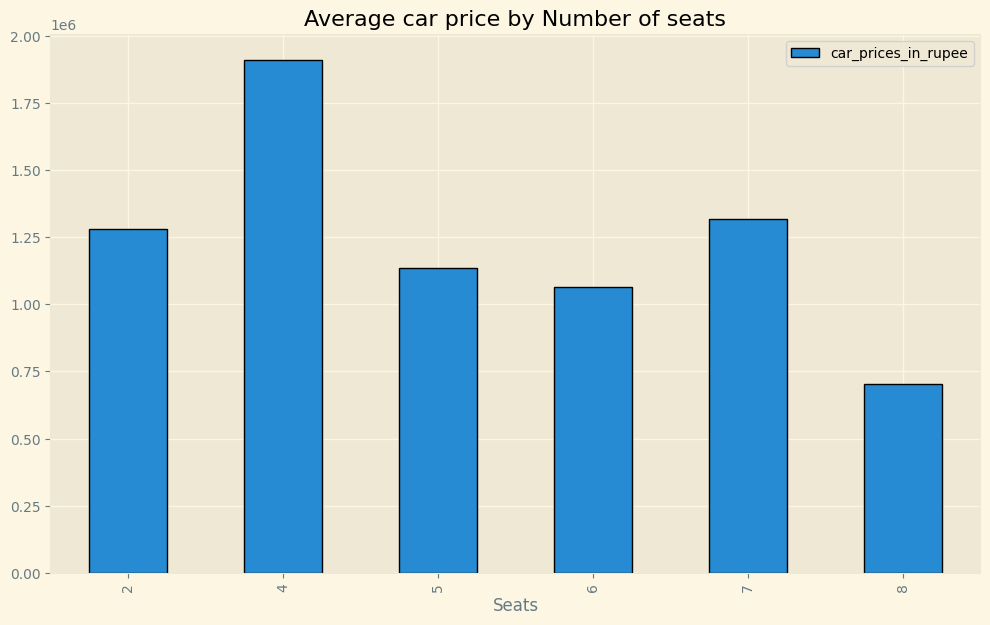

In [ ]:
#The average car price has been moving up over years
pv2=pd.pivot_table(df, index=['Seats'],values = ['car_prices_in_rupee'],aggfunc = 'mean')
pv2.plot(kind='bar',figsize=(12,7),title='Average car price by Number of seats',edgecolor = 'black')

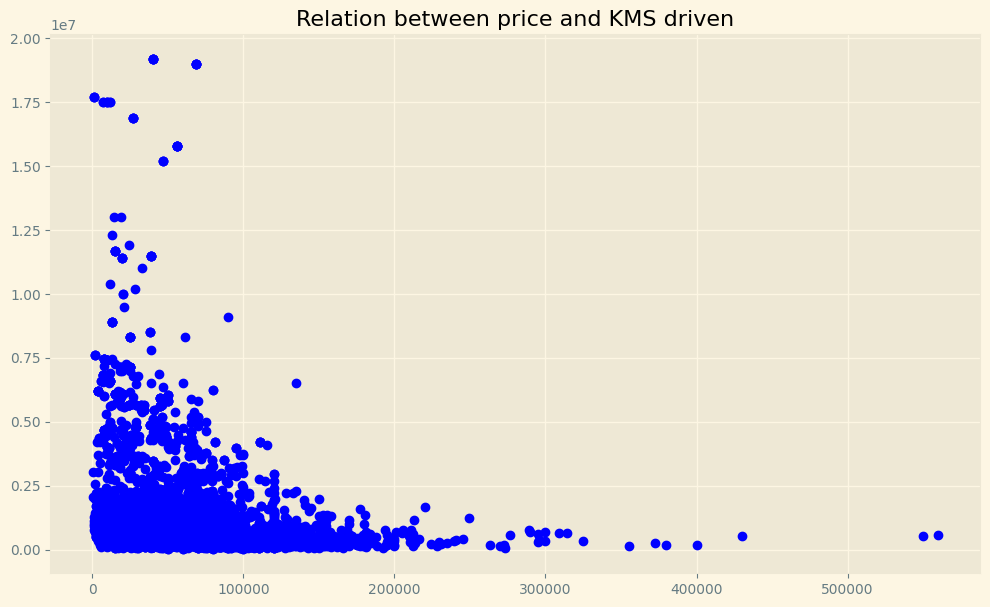

In [ ]:
#Cars with 4 seats has the highest average price in the market

plt.style.use('Solarize_Light2')
plt.figure(figsize=(12,7))
plt.title('Relation between price and KMS driven')
plt.scatter(df.kms_driven,df.car_prices_in_rupee,color="b")

<Axes: title={'center': 'Price Distribution'}, ylabel='Frequency'>

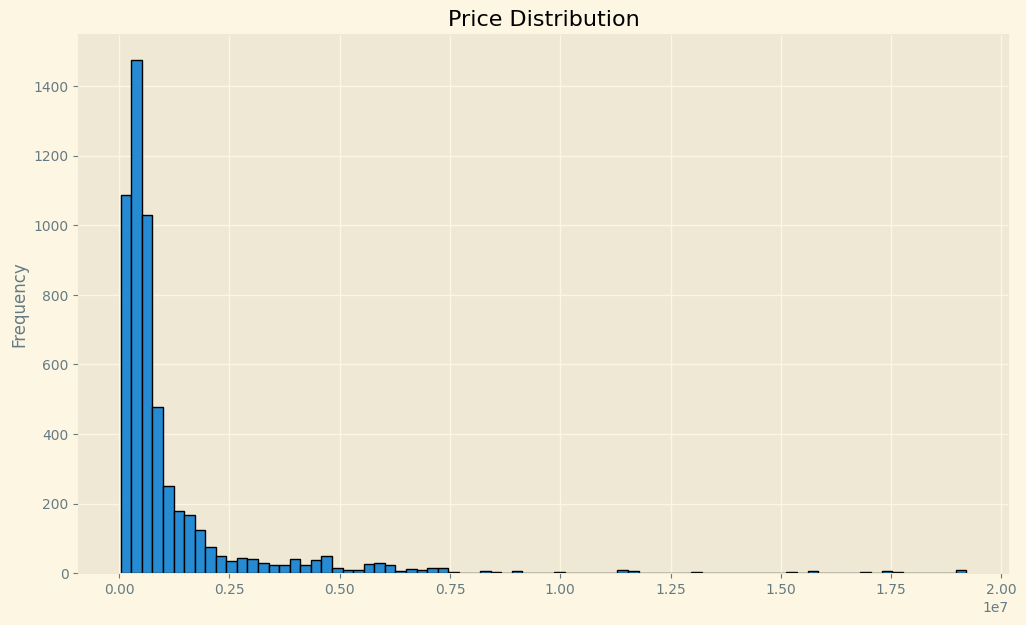

In [ ]:
plt.style.use('Solarize_Light2')
plt.style.use('Solarize_Light2')
price=df['car_prices_in_rupee']
price.plot(kind='hist',figsize=(12,7),bins=80,edgecolor = 'black',title='Price Distribution')

#Most of the cars price range between 0 and 5000000 rupees

<Axes: title={'center': 'The Most expensive 5 cars'}, ylabel='car_name'>

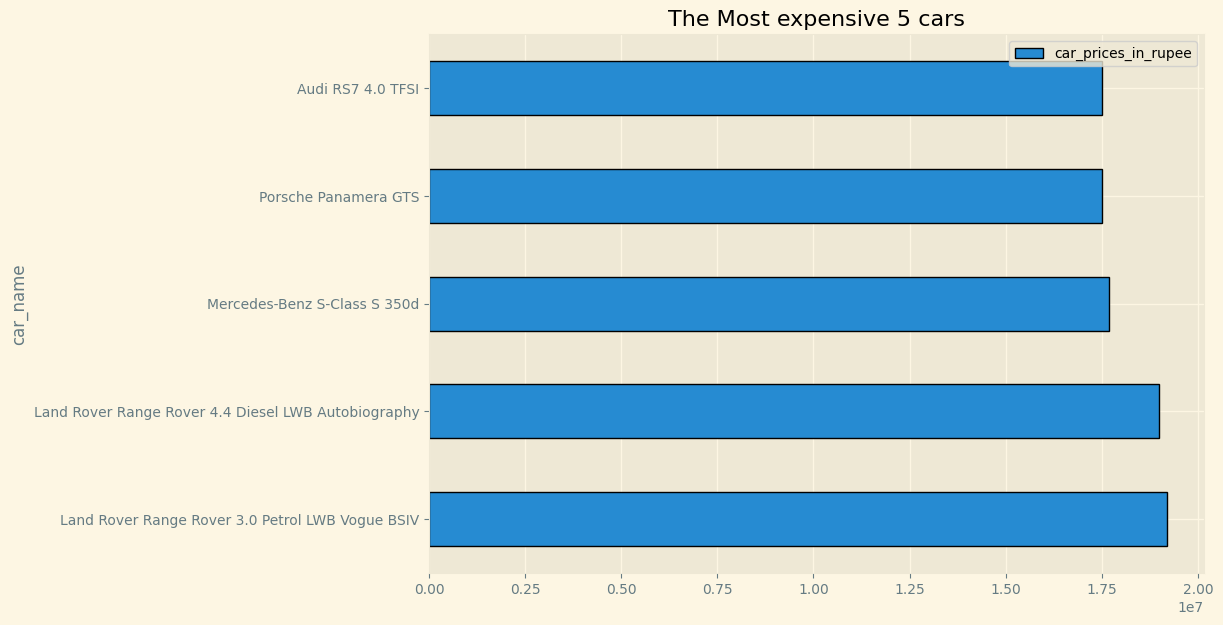

In [ ]:
top5=pd.pivot_table(df,index='car_name',values='car_prices_in_rupee').sort_values(by='car_prices_in_rupee',ascending=False)
top5=top5.head(5)
top5.plot(kind='barh',figsize=(10,7),edgecolor = 'black',title='The Most expensive 5 cars')

<Axes: title={'center': 'Price level by number of owners'}, xlabel='ownership'>

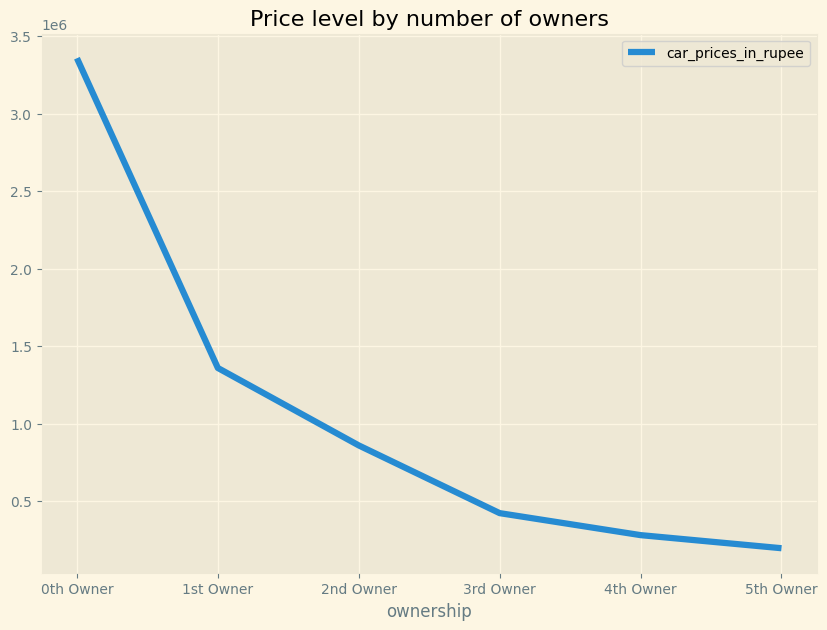

In [ ]:
#Most 5 expensive cars in the market

own=pd.pivot_table(df,index='ownership',values='car_prices_in_rupee')
own.plot(kind='line',figsize=(10,7),linewidth=4.5,title='Price level by number of owners')

<Axes: title={'center': 'Engines developement over years'}, xlabel='manufacture'>

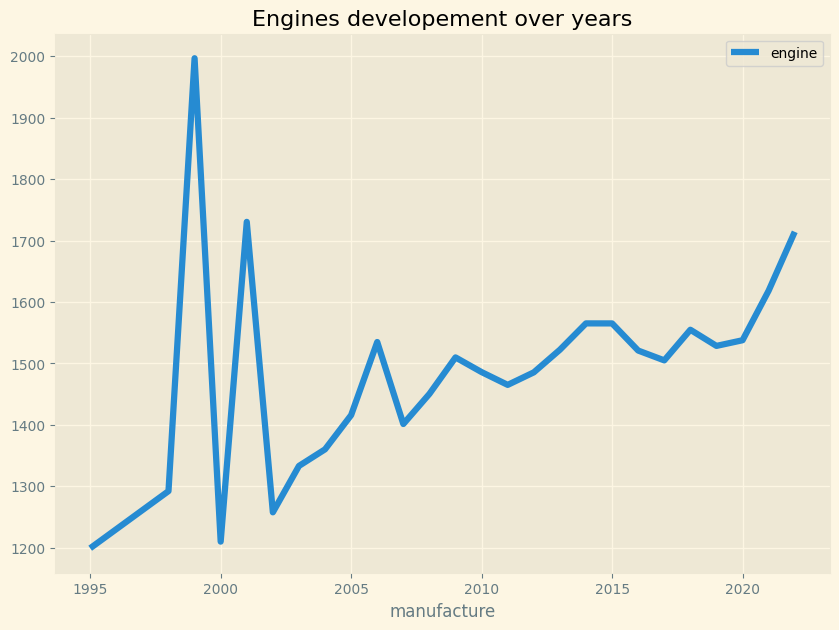

In [ ]:
#More owners mean a lower price

eng=pd.pivot_table(df,index='manufacture',values='engine',aggfunc='mean')
eng.plot(kind='line',figsize=(10,7),linewidth=4.5,title='Engines developement over years')

<Axes: title={'center': 'Average price by Fuel type'}, ylabel='transmission'>

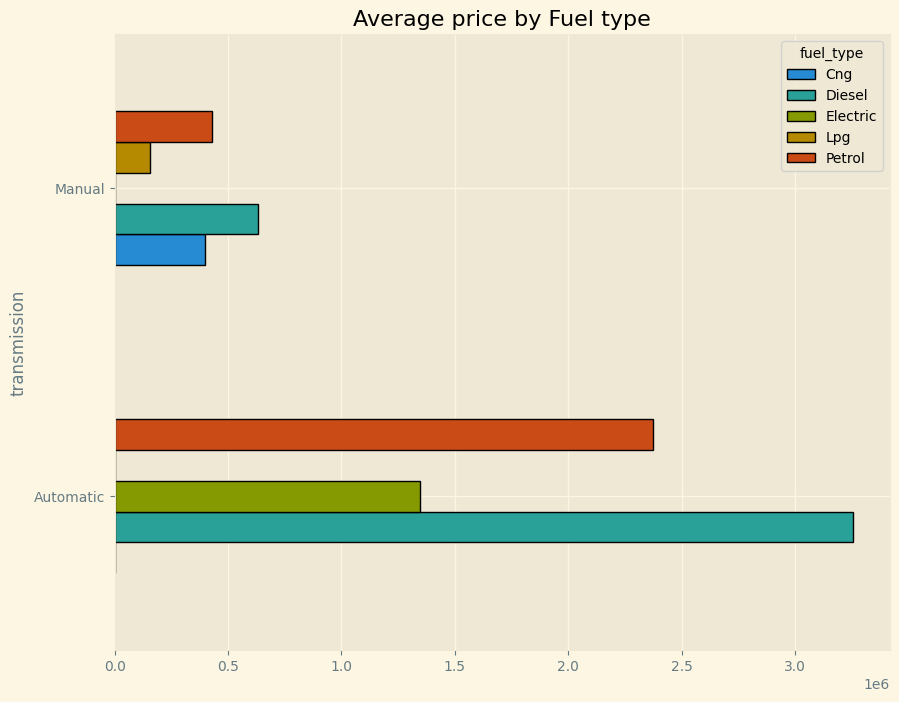

In [ ]:
#In general, the average engine rate is increasing over years

transm=pd.pivot_table(df,index='transmission',values='car_prices_in_rupee',columns='fuel_type')
transm.plot(kind='barh',figsize=(10,8),edgecolor = 'black',title='Average price by Fuel type')

<Axes: title={'center': 'Number of cars by Fuel type'}, ylabel='fuel_type'>

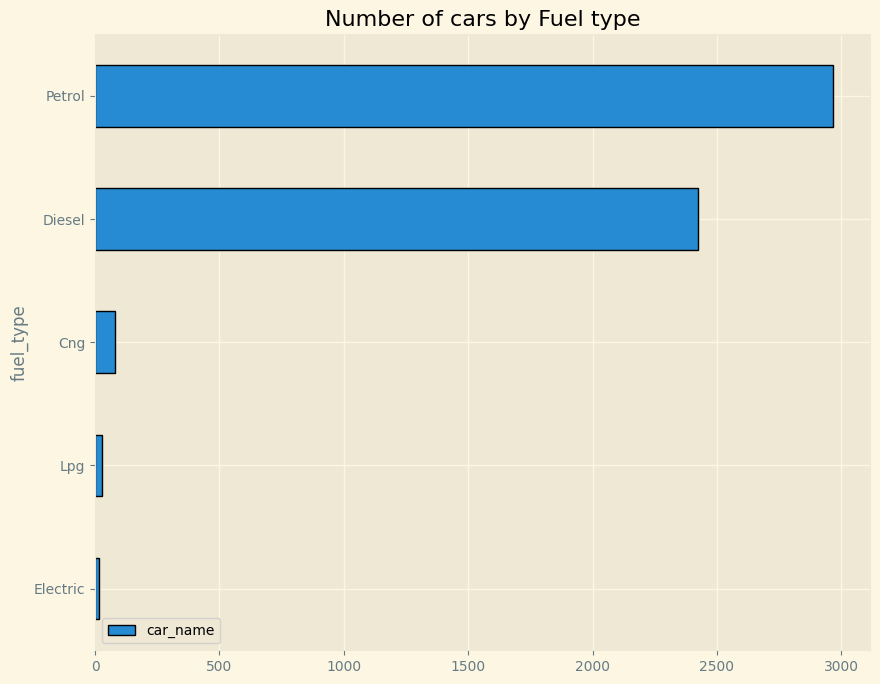

In [ ]:
#Automatic Diesel cars has the highest average price is the market, while Manuel Lpg got the lowest average car price

fuelc=pd.pivot_table(df,index='fuel_type',values='car_name',aggfunc='count').sort_values(by='car_name')
fuelc.plot(kind='barh', edgecolor = 'black',figsize=(10,8),title='Number of cars by Fuel type')

array([<Axes: ylabel='car_name'>], dtype=object)

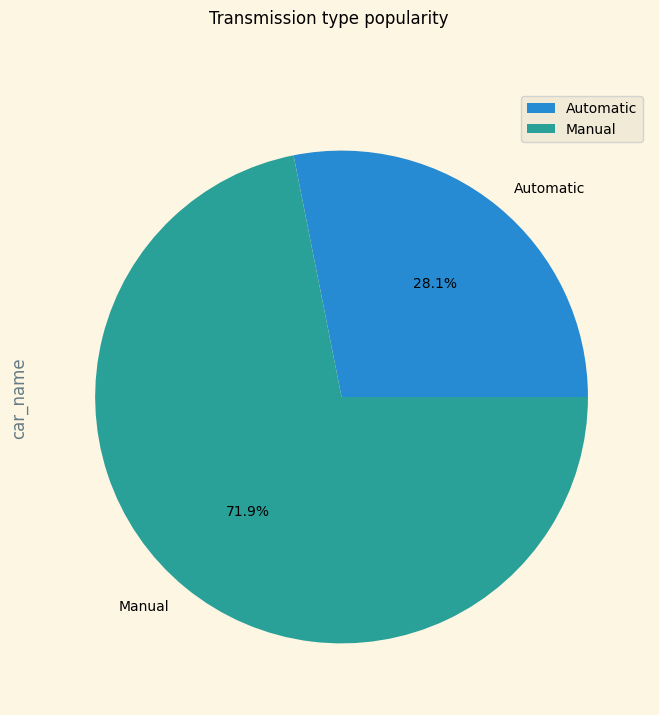

In [ ]:
#Petrol fuel cars are the most common fuel type in the market

plt.style.use('Solarize_Light2')
transmc=pd.pivot_table(df,index='transmission',values='car_name',aggfunc='count')
transmc.plot(kind='pie',figsize=(10,8),subplots=True,autopct='%1.1f%%',title='Transmission type popularity')

In [ ]:
#Manuel transission cars are more common

train=df.copy()

In [ ]:
train['car_name']=pd.factorize(train.car_name)[0]
train['fuel_type']=pd.factorize(train.fuel_type)[0]
train['transmission']=pd.factorize(train.transmission)[0]
train['ownership']=pd.factorize(train.ownership)[0]

<Axes: >

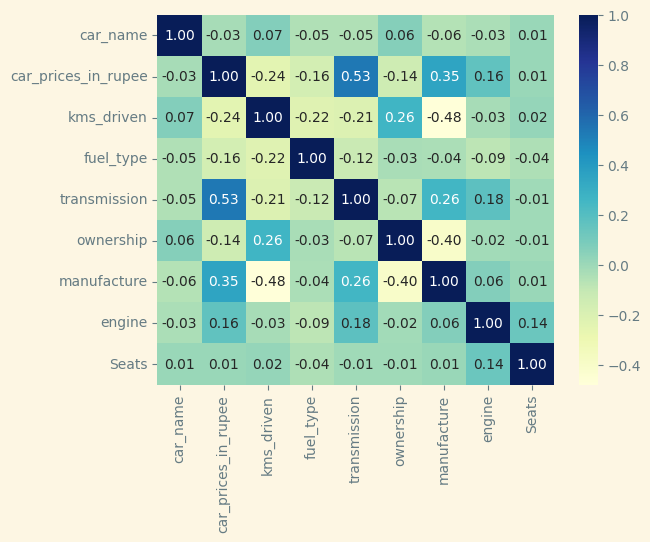

In [ ]:
plt.style.use('Solarize_Light2')
sns.heatmap(train.corr(),annot = True, cmap= 'YlGnBu', fmt= '.2f')

In [ ]:
#As we can see, transmission type, manufacture year, engine rate, fuel type and Kms driven has a strong impact on the car price.

**MACHINE LEARNING**

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 5439
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5512 non-null   int64  
 1   car_prices_in_rupee  5512 non-null   float64
 2   kms_driven           5512 non-null   int64  
 3   fuel_type            5512 non-null   int64  
 4   transmission         5512 non-null   int64  
 5   ownership            5512 non-null   int64  
 6   manufacture          5512 non-null   int64  
 7   engine               5512 non-null   int64  
 8   Seats                5512 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 430.6 KB


In [ ]:
#Setting Features and terget
X= train.drop(columns='car_prices_in_rupee',axis=1)
Y= train['car_prices_in_rupee']

In [ ]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 100)

In [ ]:
#model TTrainiing
xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
#Model Accurecy'
score1 = xgbr.score(X_train,y_train)
score1

0.9847485481456919

In [ ]:
y_pred1 = xgbr.predict(X_test)
rscore1=r2_score(y_test, y_pred1)
rscore1

0.7401568264264318

In [ ]:
df['Price_prediction']=xgbr.predict(X)

In [ ]:
df.head

<bound method NDFrame.head of                                     car_name  car_prices_in_rupee  kms_driven  \
0     Jeep Compass 2.0 Longitude Option BSIV            1003000.0       86226   
1               Renault Duster RXZ Turbo CVT            1283000.0       13248   
2                         Toyota Camry 2.5 G            1640000.0       60343   
3                          Honda Jazz VX CVT             777000.0       26696   
4           Volkswagen Polo 1.2 MPI Highline             515000.0       69414   
...                                      ...                  ...         ...   
5050                Maruti Wagon R LXI Minor              82642.0      166155   
5094                  Chevrolet Spark 1.0 PS              73582.0       89133   
5149              Chevrolet Spark 1.0 LS LPG              59736.0      192340   
5177                      Tata Indica TDI LS              95633.0      130265   
5439                            Maruti Zen D              80000.0      120000  

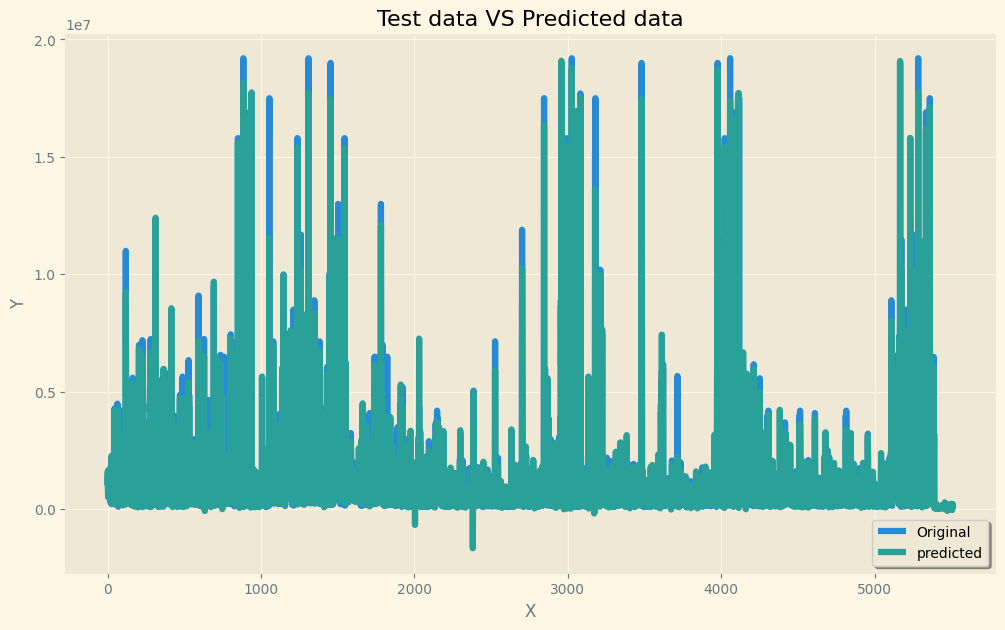

In [ ]:
prd=df['Price_prediction']
x_ax = range(len(Y))
plt.figure(figsize=(12,7))
plt.plot(x_ax, Y,linewidth = '4.5', label="Original")
plt.plot(x_ax, prd, linewidth = '4.5', label="predicted")
plt.title("Test data VS Predicted data")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='lower right',fancybox=True, shadow=True)
plt.show()

Text(0.5, 1.0, 'Prediction and Original data correlation')

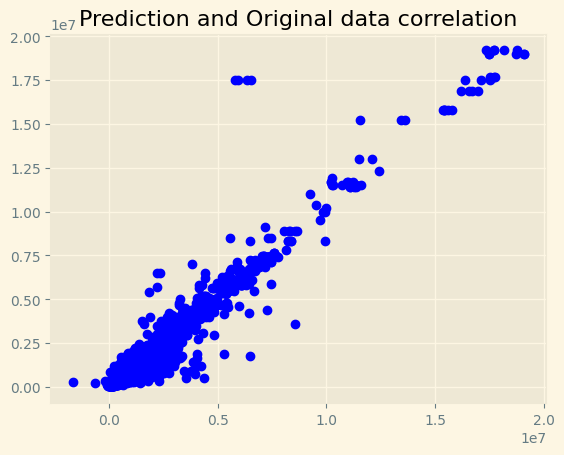

In [ ]:
plt.scatter(df['Price_prediction'],df['car_prices_in_rupee'],color="b")
plt.title('Prediction and Original data correlation')